#### Problem Statement
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np

#Importing Visualising libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import missingno as msno
import warnings

#Importing warning and filtering them
warnings.filterwarnings('ignore')

#Importing libraries for datacleaning and preprocessing   
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [2]:
#Laoding Dataset and Displaying top 10 records 

happiness = pd.read_csv('happiness_score_dataset.csv')
happiness.head(10) #Top 10 entries which are also order by top Happiness Ranks 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


<AxesSubplot:xlabel='Region', ylabel='count'>

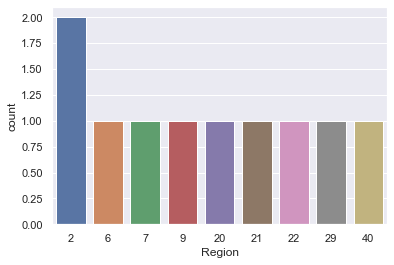

In [3]:
#Univariate Analysis
print(happiness['Region'].value_counts())
sns.countplot(happiness['Region'].value_counts())

#### About Dataset 
 - Country : Names of Countries
 - Region : Countries divided into 10 different regions around the globe
       1. Sub-Saharan Africa                
       2. Central and Eastern Europe       
       3. Latin America and Caribbean        
       4. Western Europe
       5. Middle East and Northern Africa 
       6. Southeastern Asia 
       7. Southern Asia 
       8. Eastern Asia 
       9. Australia and New Zealand 
       10. North America
 - Standard Error : unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations.
 - Dystopia Residual: The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country. If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
 - The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.


In [4]:
# Checking column description to get Datatype of predictors
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

happiness dataset has 12 columns:
- 9[Happiness Score	Standard Error	Economy (GDP per Capita)	Family	Health (Life Expectancy)	Freedom	Trust (Government Corruption)	Generosity	Dystopia Residual are of float dtype], 
- 2 object dtype[Country	Region] 
- 1 int dtype[Happiness Score].
- All columns are non-null i.e. doesn't contain any NaNs.

In [5]:
#checking Datatypes of independent Variables
happiness.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
#Determining the shape of the Dataset
happiness.shape 

(158, 12)

happiness dataset consists of 12 columns and 158 rows

In [7]:
#Checking Null Values if any
happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
#Checking Duplicate rows if any
happiness.duplicated().sum()

0

<AxesSubplot:>

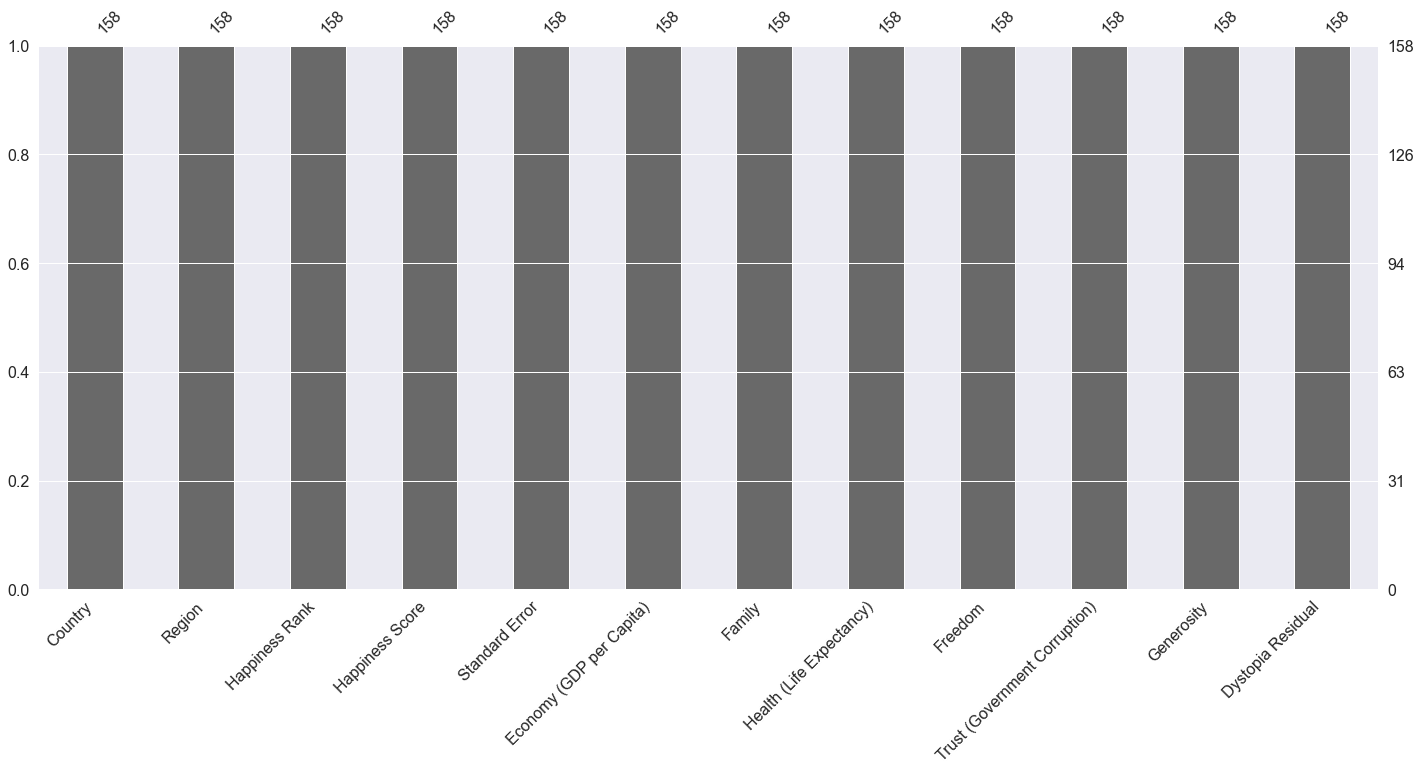

In [9]:
#Cross Checking Null Values with a bar graph
msno.bar(happiness)

In [10]:
#Interpreting statistical overview of dataset 
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### Drawing Conclusions
- Happiness Rank : max value is 158 and min is 1
- Happiness Score : range (2.839,7.587) , mean = 5.37, median = 5.23, std = 1.14  which shows us data is normally distributed
- Standard Error : range(0.017,0.136), mean = 0.17, median = 0.52, std = 0.017 which shows us data is normally distributed
- Economy (GDP per Capita): range(0,1.690420), mean = 0.991, median = 1.21, std = 0.272 which shows us data is normally distributed
- Family : range(0,1.42), mean = 0.99, median = 1.029, std = 0.27 which shows us data is normally distributed
- Health (Life Expectancy) : range(0,1.025), mean = 0.63, median = 0.69, std = 0.24 which shows us data is normally distributed
- Freedom : range(0,0.66), mean = 0.42, median = 0.43, std = 0.15 which shows us data is normally distributed
- Trust (Government Corruption)	: range(0,0.55), mean = 0.14, median = 0.10, std = 0.12 which shows us data is normally distributed
- Generosity : range(0,0.79), mean = 0.23, median = 0.21, std = 0.23 which shows us data is normally distributed
- Dystopia Residual	: range(0.32,0.3.602), mean = 2.098, median = 2.095, std = 0.553 which shows us data is normally distributed

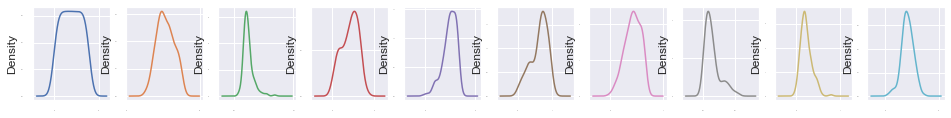

In [11]:
#Visualizinf Normal distribution and dispersion of columns using density graph
#Multivariate Analysis
happiness.plot(kind='density',subplots=True,layout=(6,11), sharex = False, legend = False, fontsize = 1, figsize=(18,12))
plt.show()

Data is normally distributed although skewness is present

Text(0, 0.5, 'Countries of Various Regions')

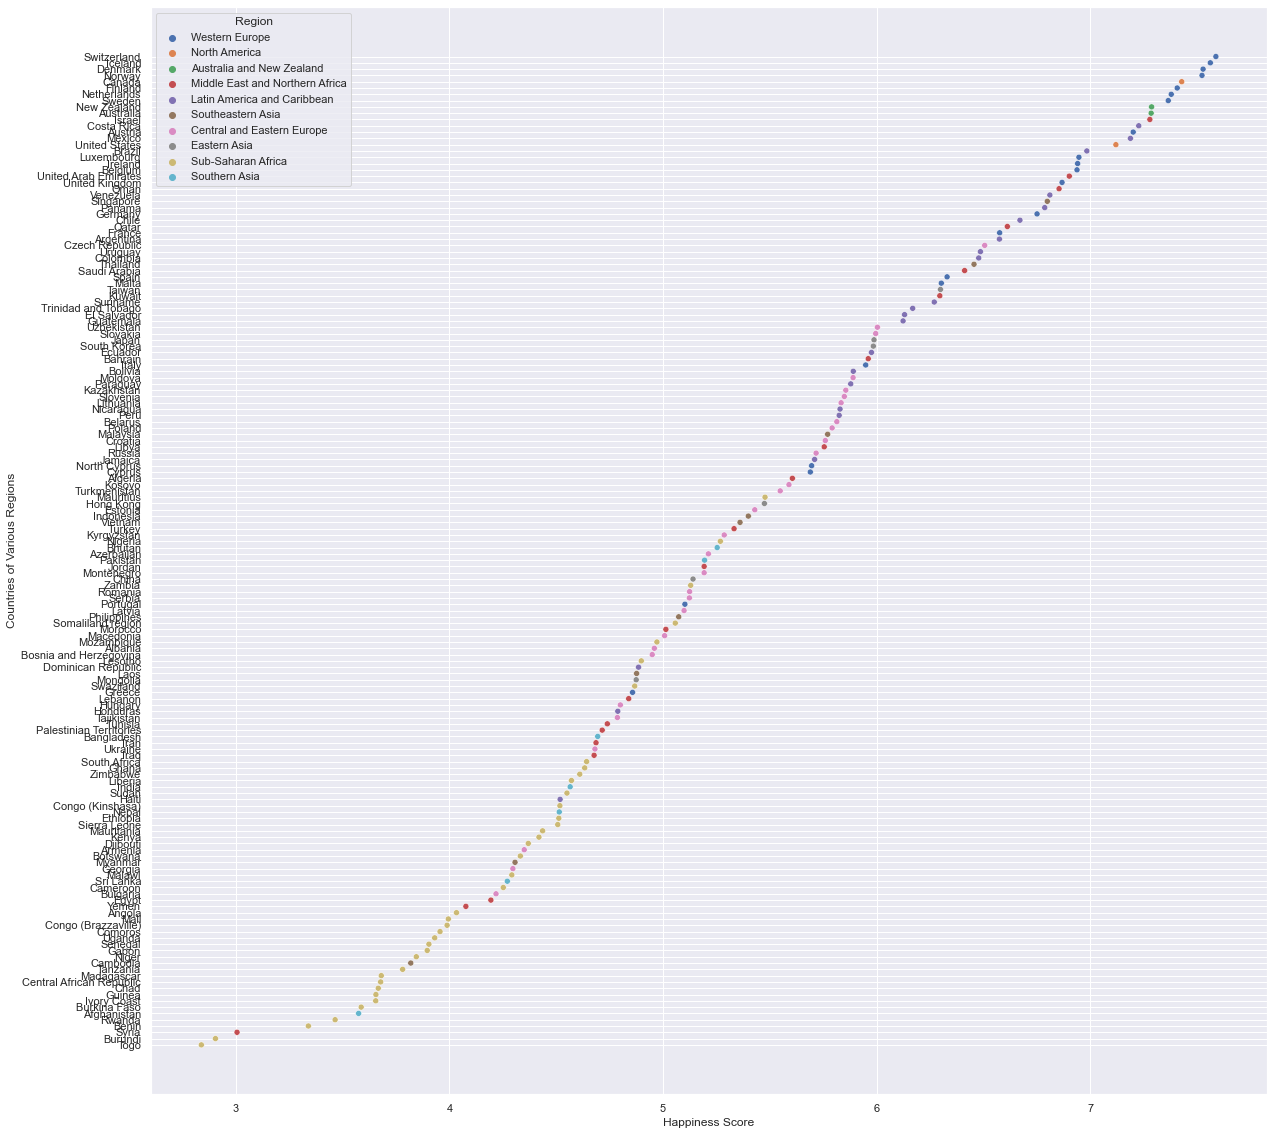

In [12]:
#Bivariate Analysis
plt.figure(figsize = (20,20))
sns.scatterplot(data = happiness, x = 'Happiness Score', y = 'Country', hue = 'Region')
plt.ylabel('Countries of Various Regions')

It should be noted that:
- Western Europe consists of majority of countries with Happiness score greater than 6
- Sub Saharan African consists of countries which majorly have happiness score lower than 4.5

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Country'>

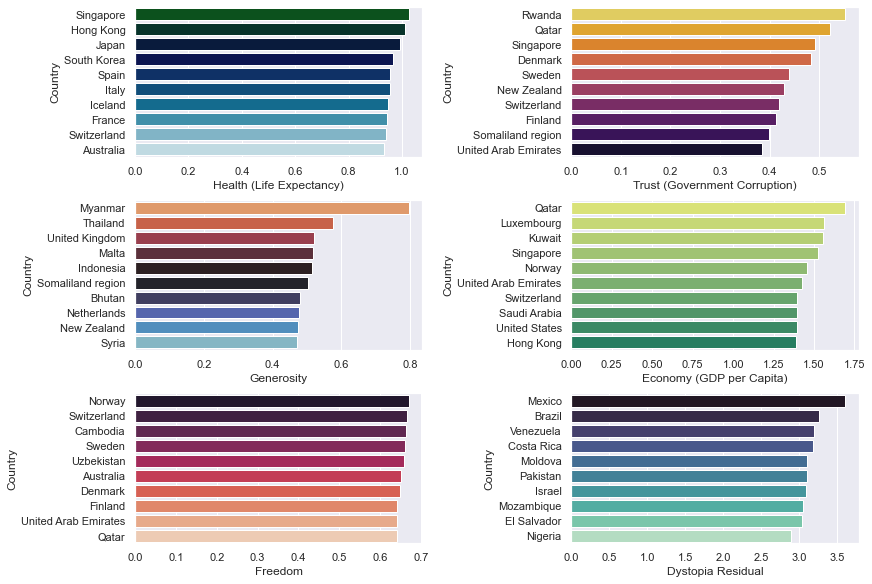

In [13]:
#Multiple Bivariate Analysis 
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

# Plotting top 10 countries on basis of highest Health(Life Expectancy)
sns.barplot(x='Health (Life Expectancy)',y='Country',data=happiness.nlargest(10,'Health (Life Expectancy)'),ax=axes[0,0],palette="ocean")

# Plotting top 10 countries on basis of highest Trust(Government Corruption)
sns.barplot(x='Trust (Government Corruption)' ,y='Country',data=happiness.nlargest(10,'Trust (Government Corruption)'),ax=axes[0,1],palette="inferno_r")

# Plotting top 10 countries on basis of Generosity
sns.barplot(x='Generosity' ,y='Country',data=happiness.nlargest(10,'Generosity'),ax=axes[1,0],palette='icefire_r')

# Plotting top 10 countries on basis of highest Economy(GDP per Capita)
sns.barplot(x='Economy (GDP per Capita)' ,y='Country',data=happiness.nlargest(10,'Economy (GDP per Capita)'),ax=axes[1,1],palette='summer_r')

# Plotting top 10 countries on basis of highest Freedom
sns.barplot(x='Freedom' ,y='Country',data=happiness.nlargest(10,'Freedom'),ax=axes[2,0], palette='rocket')

# Plotting top 10 countries on basis of highest Dystopia Residual
sns.barplot(x='Dystopia Residual' ,y='Country',data=happiness.nlargest(10,'Dystopia Residual'),ax=axes[2,1],palette='mako')

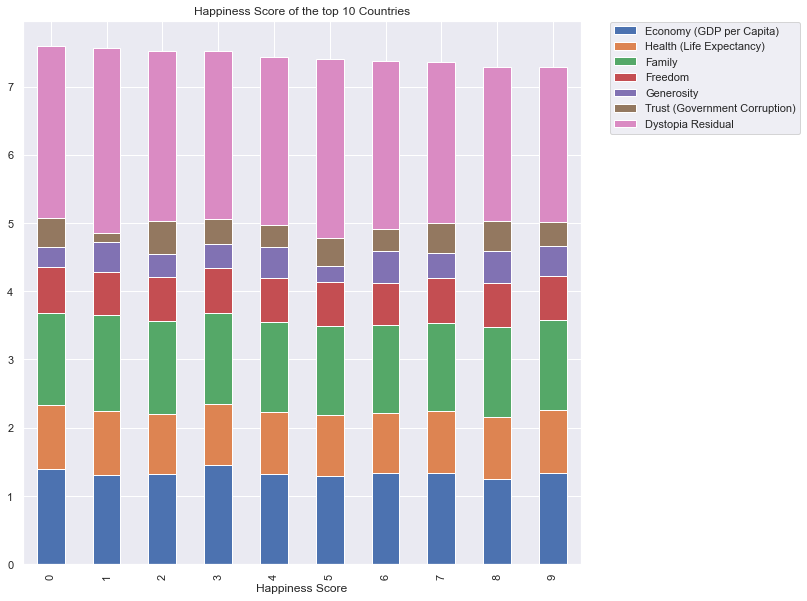

In [14]:
#Multivariate Analysis
#Visualising top 10 countries with their high Happiness Scores
happiness[['Economy (GDP per Capita)', 'Health (Life Expectancy)','Family', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']].head(10).plot(kind='bar',
                                                                stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

It can be observed that Dystopia Residual, Economy (GDP per Capita), Family and Health(Life Expectancy) contributes majorly on assesing Happiness Score

<Figure size 2880x2880 with 0 Axes>

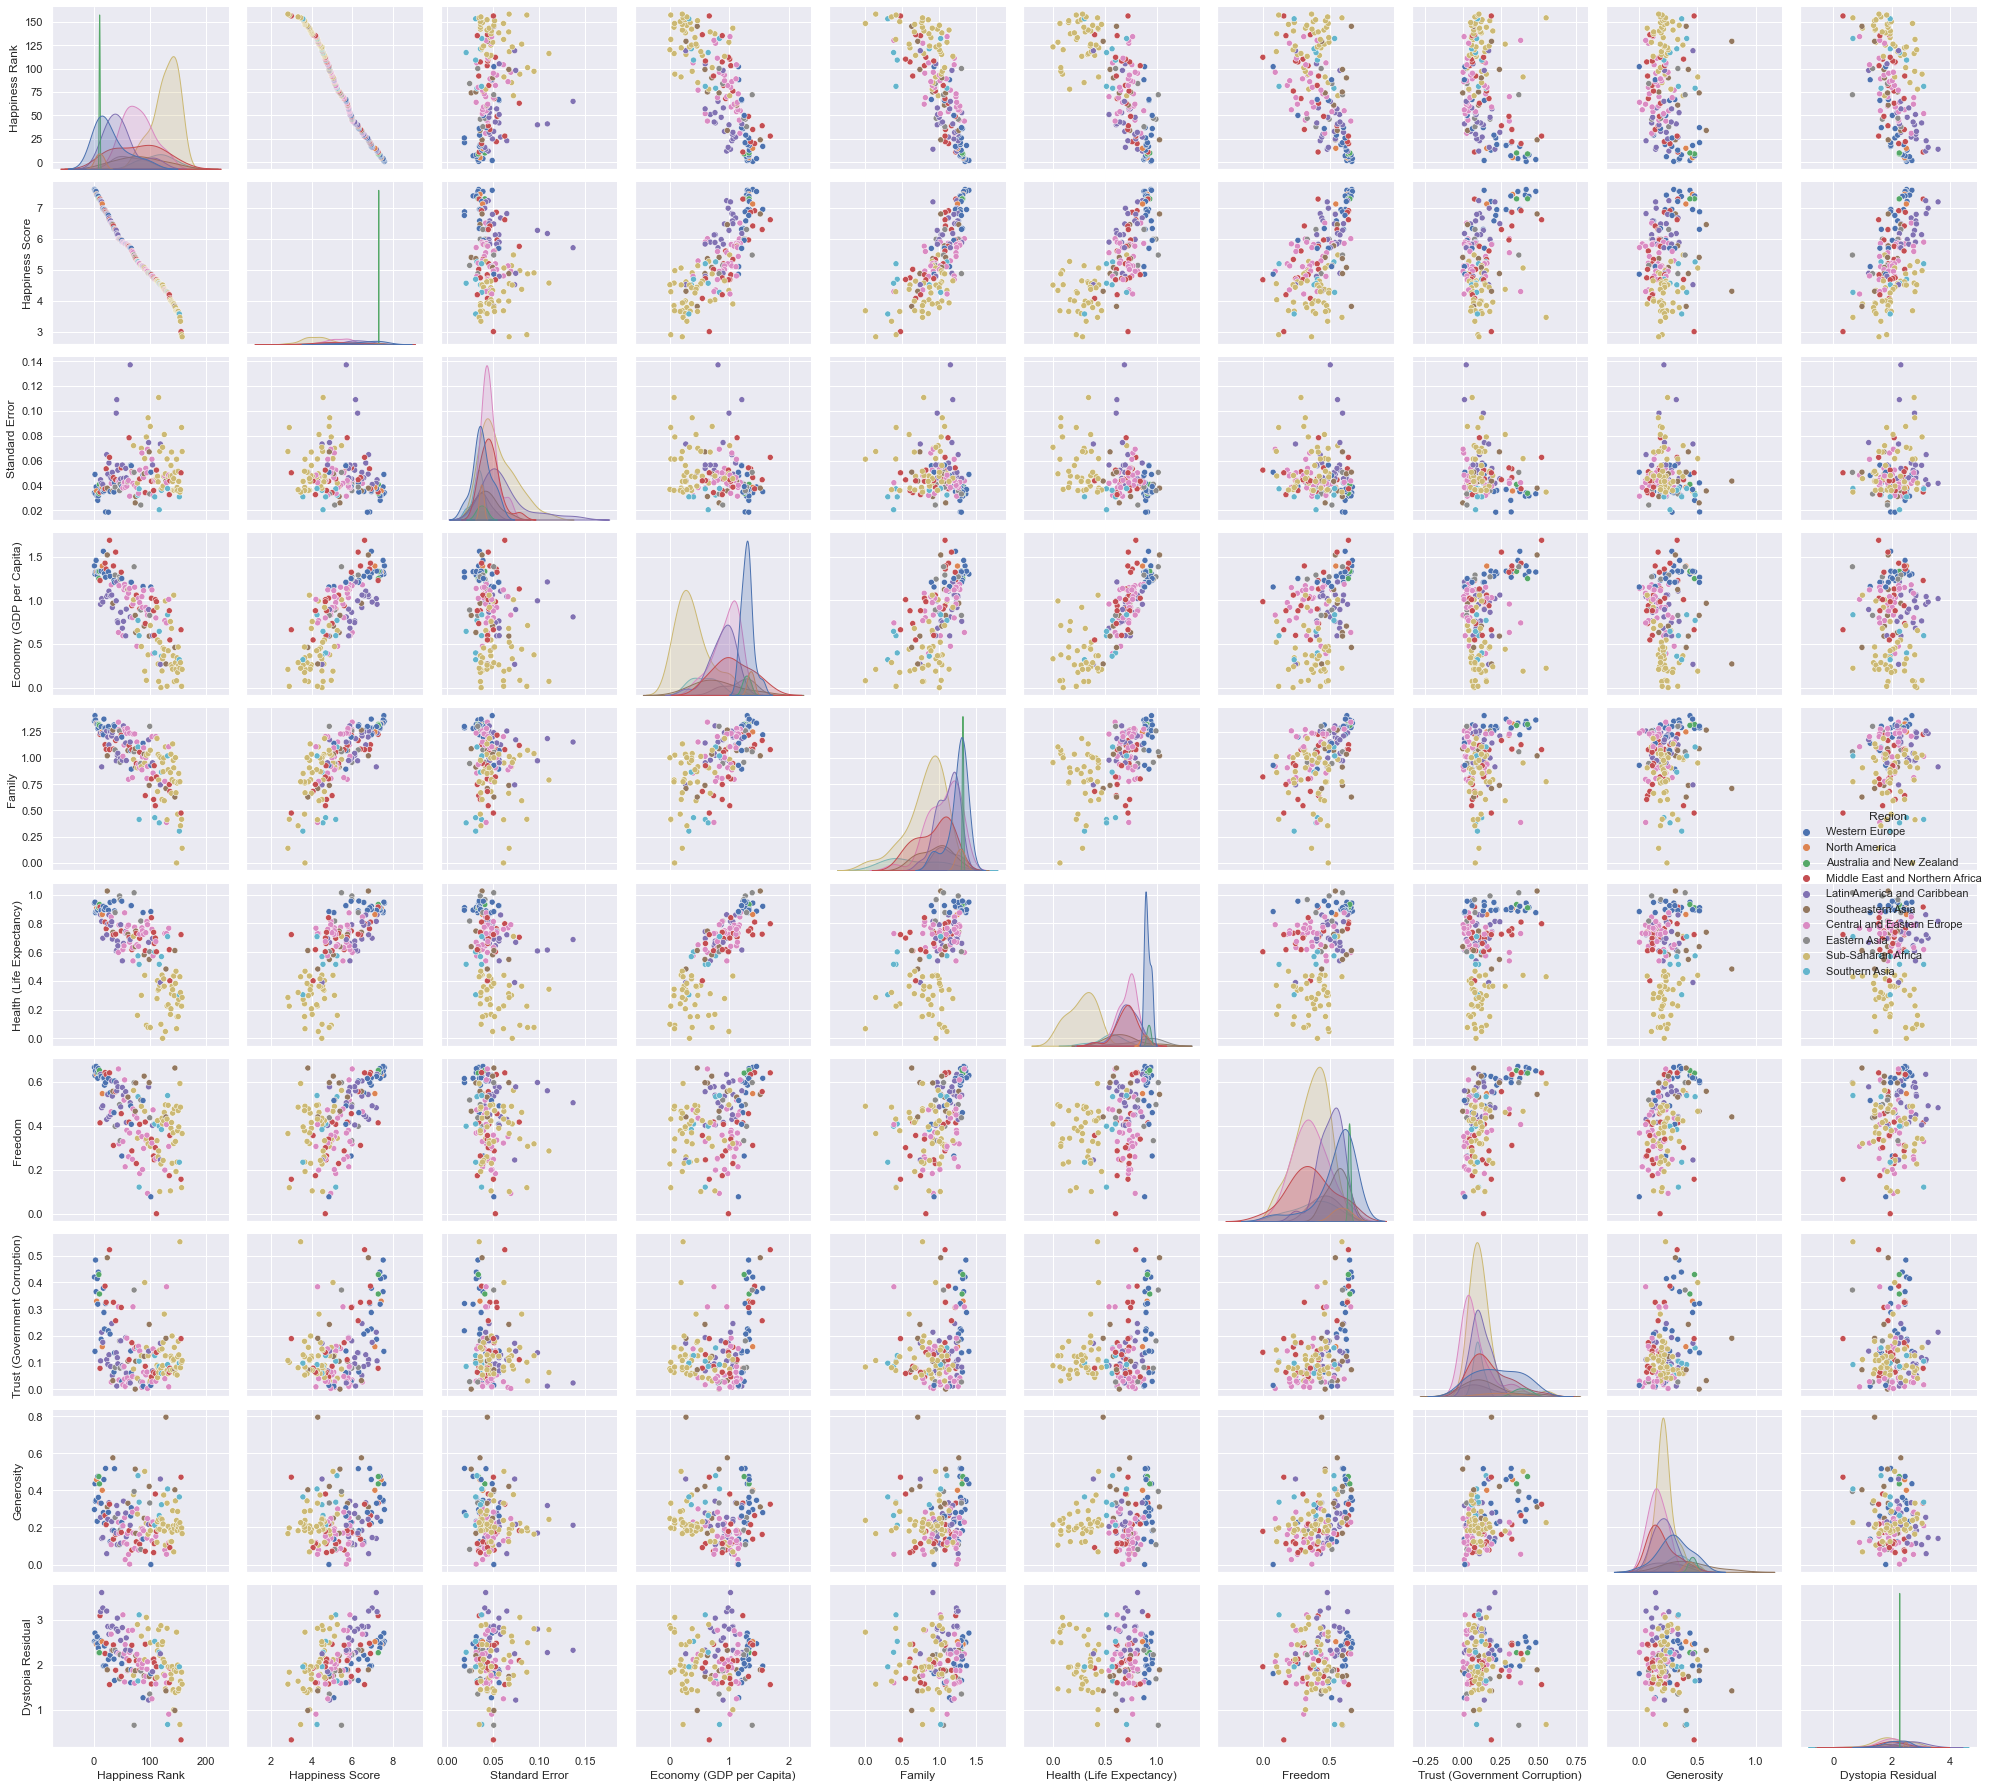

In [15]:
#Visualizing data correlation and multicollinearity among features and label and grouping Datapoints on the basis of Region
#MultiVariate Analysis
plt.figure(figsize = (40,40))
sns.pairplot(happiness, hue = 'Region')
plt.tight_layout()

- We can interpret that there is a very high multicollinearity between Happiness Rank and Happiness Score.
- Economy (GDP per Capita), Family, Freedom, Trust(Corruption) and Dystopia Residual have a positive correlation with Happiness Rank and Happiness Score
- Standard Error and Generosity have a very little correlation with Happiness Rank and Happiness Score.


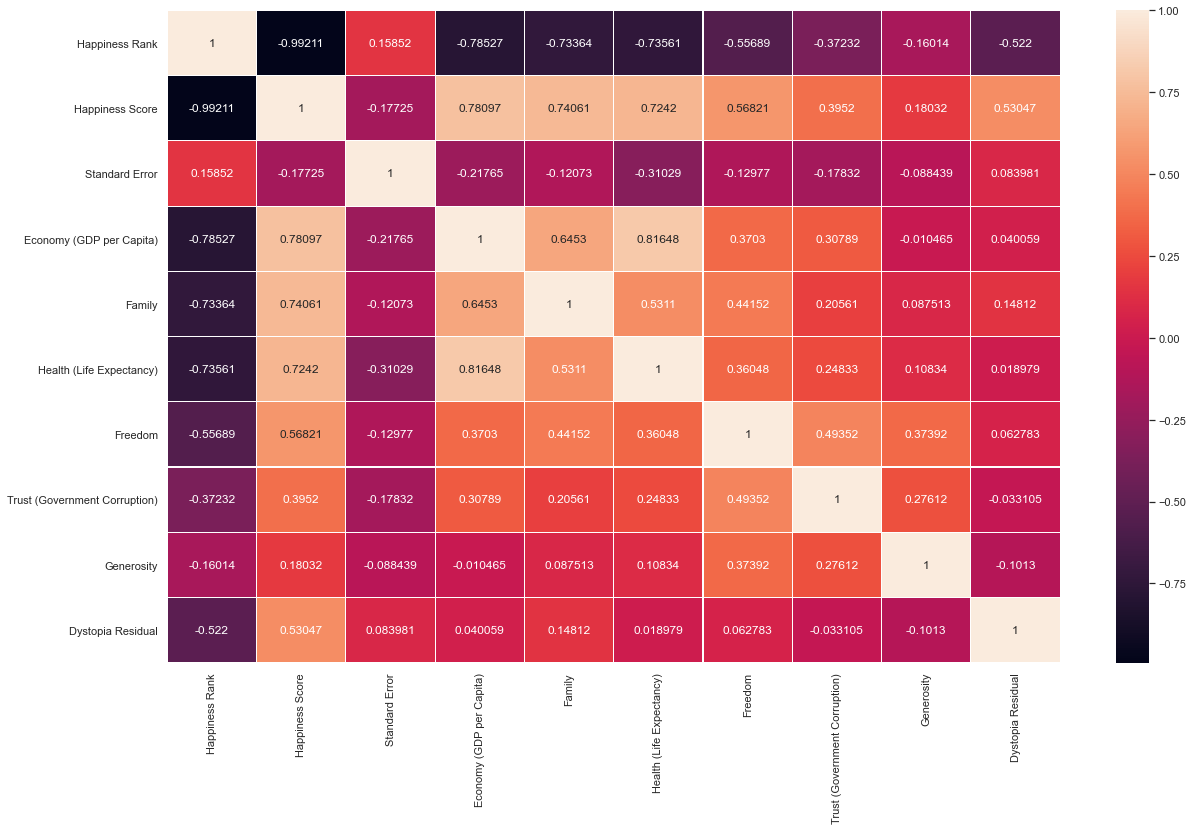

In [16]:
#Multivariate Analysis 
#Plotting heatmap to visualise correlation
plt.figure(figsize = [20,12])
sns.heatmap(happiness.corr(), annot = True,linewidths=0.1,fmt = '.5g' )
plt.show()

Happiness Score and Happiness Rank both are very highly correlated. Therefore for further analysis we'll drop Happiness Rank.

In [17]:
df = happiness.drop(columns = ['Happiness Rank', 'Country', 'Region'], axis = 1)
#dropping Country and Region because they consists of Categorical Data.

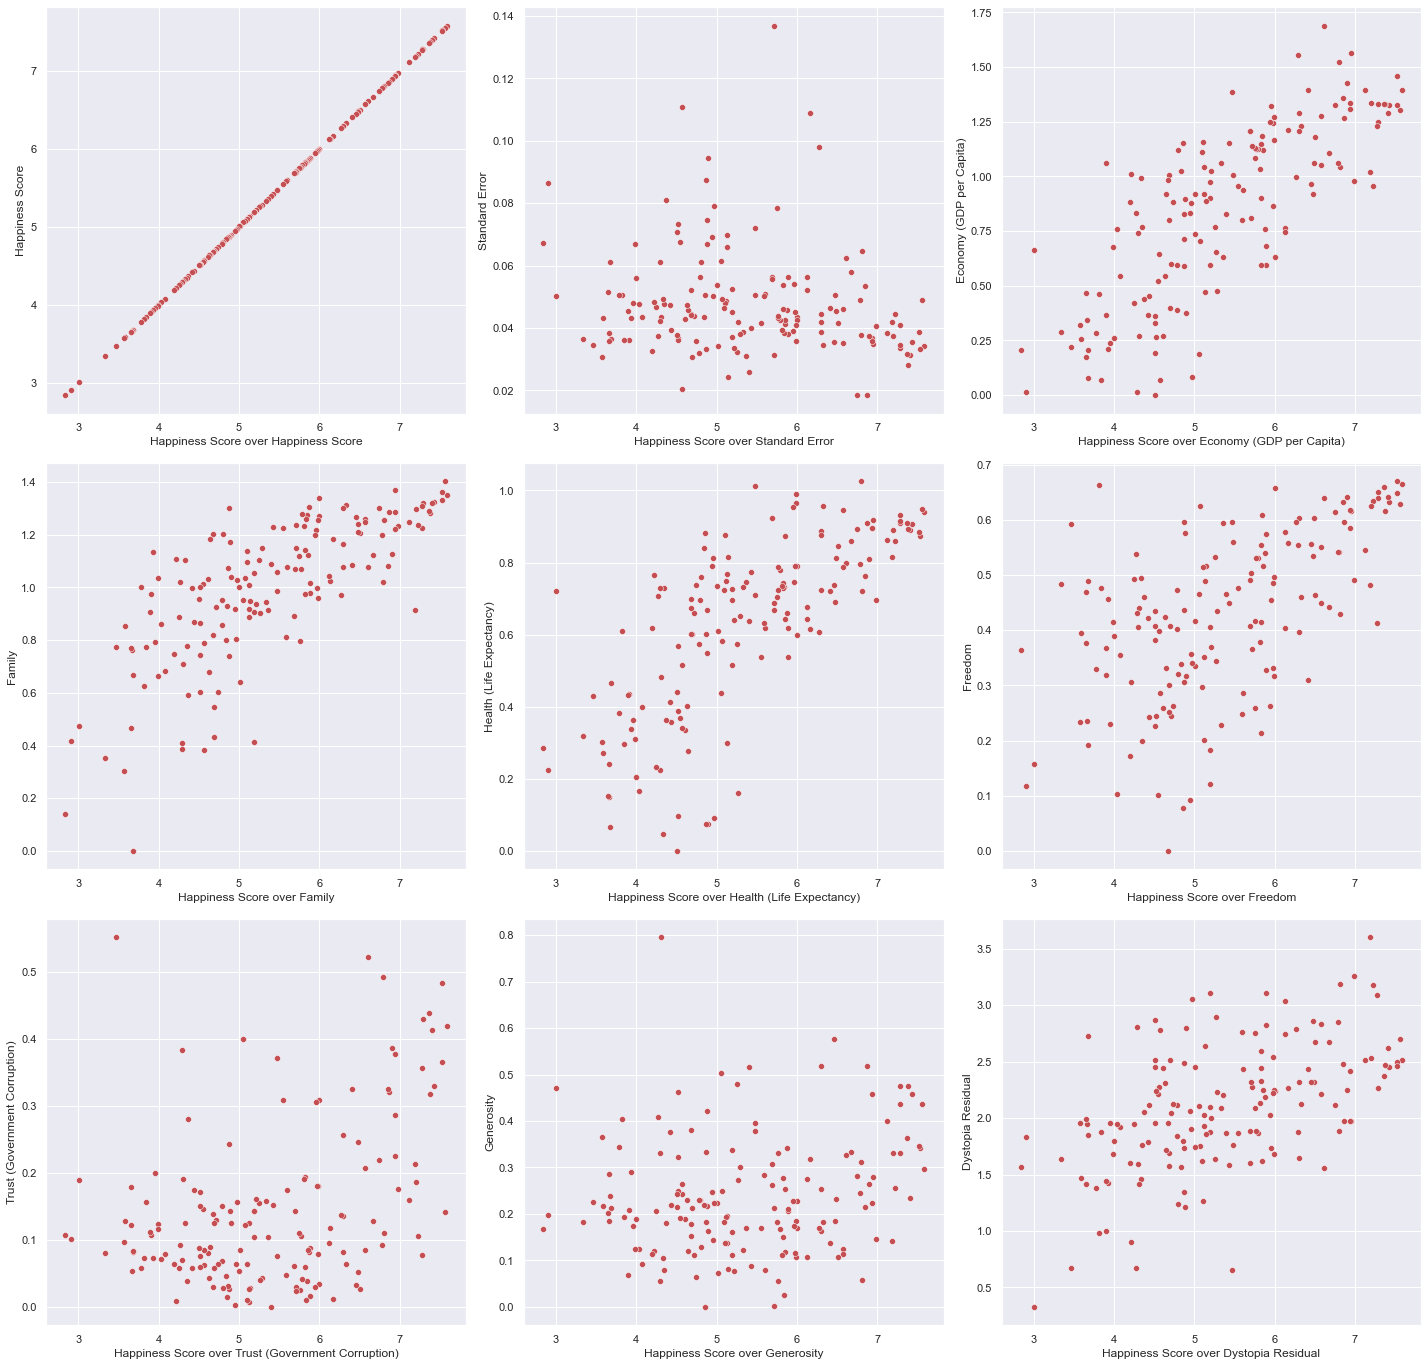

In [18]:
#MultiVariate Analysis
plt.figure(figsize = (20,25), facecolor ='white')
plotnumber=1

for column in df:
    if plotnumber<=12: 
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(data=df , y = column, x = 'Happiness Score', color = 'r')
        plt.xlabel('Happiness Score over ' + column)
    plotnumber+=1
plt.tight_layout()

- Economy (GDP per Capita), Family, Freedom, Trust(Government Corruption) and Dystopia Residual have a positive correlation with Happiness Rank and Happiness Score
- Standard Error and generosity doesn't contribute much.
- Data is widely dispersed(i.e. presence of ouliers) in Freedom,Trust(Government Corruption), Generosity, Standard Error and Dystopia Residual

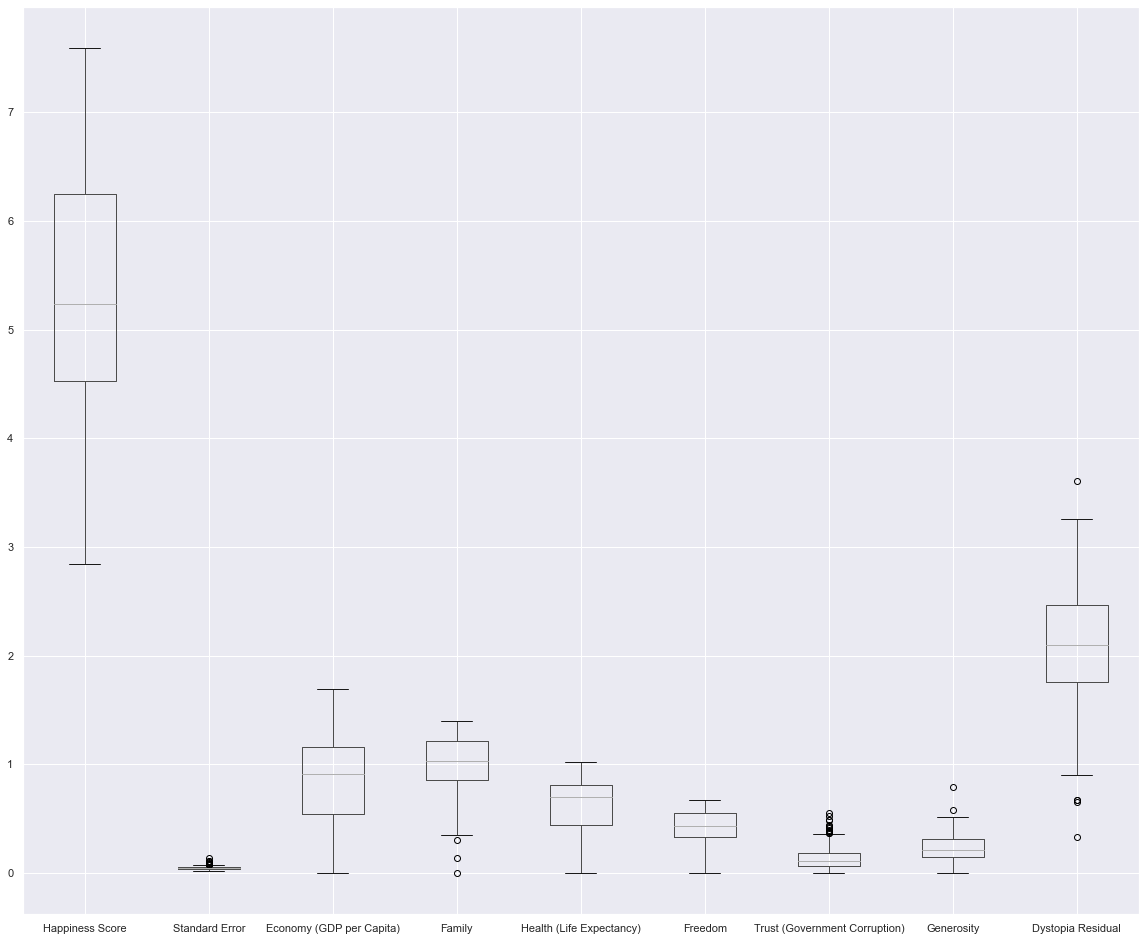

In [19]:
#Multivariate Analysis
#using boxplot to detect outliers

df.boxplot(figsize = (20,20))
plt.subplots_adjust(bottom = 0.25)
plt.show()

data consists of outliers aka Skewness.

In [20]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

if skewness is higher than 0.5 and lower than -0.5 then data needs to be cleaned.
we have 4 highly skewed features
- Standard Error                   1.983439
- Family                          -1.006893
- Trust (Government Corruption)    1.385463
- Generosity                       1.001961

#### Data Cleaning

In [21]:
#Splitting Dataset into dependent and independent variables
X = df.drop('Happiness Score',axis = 1)
y = df['Happiness Score']

In [22]:
#Our dataset in not strictly positive that's why we are using Yeo-Johnson power transformation to remove skewness
pt = PowerTransformer(method='yeo-johnson')
X_trans = pd.DataFrame(pt.fit_transform(X), columns = X.columns)
X_trans.skew()

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [23]:
#splitting Dataset using train_test_split into train data and test data in 75:25 ratio
X_train,X_test,y_train,y_test = train_test_split(X_trans,y,test_size= 0.25)

### Using Linear Regression Model

In [24]:
#Instantiating Linear Regression Model and fitting training Dataset
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  99.21 %
Linear Regression Model Confidence on training set :  99.17 %


In [26]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [27]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  5.36947040734334 

Features and their corresponding weights:


,features,coefficients
0,Standard Error,0.003017
1,Economy (GDP per Capita),0.410392
2,Family,0.275830
3,Health (Life Expectancy),0.254029
4,Freedom,0.137578
5,Trust (Government Corruption),0.084803
6,Generosity,0.099703
7,Dystopia Residual,0.525655


In [28]:
#Applying Evaluation metrics to our Regression model
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error for our Linear Regression Model: 0.07633936625076358
Mean Squared Error for our Linear Regression Model: 0.010025821216405788
Root Mean Squared Error for our Linear Regression Model: 0.10012902284755298


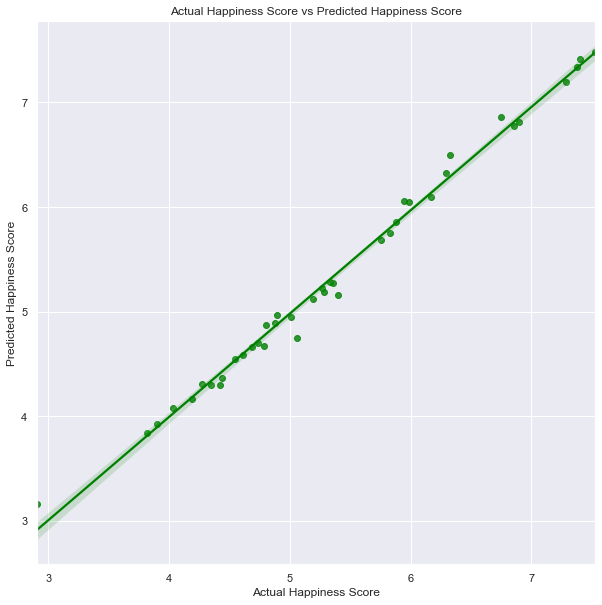

In [30]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X_trans, color = 'green')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score vs Predicted Happiness Score')
plt.show()

In [31]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(lm,X_train,y_train, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 99.0 %


### Using Ordinary Least Square models

In [32]:
#just Renaming column names
X1 = pd.DataFrame(df.rename({'Standard Error' : 'Error','Happiness Score' : 'Score','Economy (GDP per Capita)': 'Economy','Health (Life Expectancy)' : 'Health', 'Trust (Government Corruption)': 'Corruption', 'Dystopia Residual' : 'Residual'}, axis = 1))
X1

,Score,Error,Economy,Family,Health,Freedom,Corruption,Generosity,Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [33]:
OLS = smf.ols(formula = 'Score ~ Error + Economy + Family + Health + Freedom + Corruption + Generosity + Residual', data = X1).fit()
OLS.conf_int()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.212e+08
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:00:08   Log-Likelihood:                 1071.3
No. Observations:                 158   AIC:                            -2125.
Df Residuals:                     149   BIC:                            -2097.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.401e-05      0.000      0.500      0.618      -0.000       0.000
Error         -0.0002      0.001     -0.125      0.901      -0.003       0.003
Economy        1.0001      0.000   8808.239      0.000       1.000       1.000
Family         1.0000      0.000   8646.697      0.000       1.000       1.000
Health         0.9999      0.000   5988.062      0.000       1.000       1.000
Freedom        0.9997      0.000   5042.045      0.000       0.999       1.000
Corruption     0.9999      0.000   4427.968      0.000       0.999       1.000
Generosity     1.0001      0.000   4939.709      0.000       1.000       1.000
Residual       1.0000   4.19e-05   2.38e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                       36.122   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.764
Skew:                          -0.069   Prob(JB):                       0.0206
Kurtosis:                       1.923   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print("R^2 score : ", round(OLS.rsquared,2)*100,'%')

R^2 score :  100.0 %


### Using LassoCV for Regularization

In [35]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=1000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.00013908156544514502

In [36]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.00013908156544514502)

In [37]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  99.2 %


There is no change in Model confidence after Regularization with L2 which shows our model was not overfitted.

#### Saving Model

In [38]:
import joblib
joblib.dump(lm,"HappinessAnalysisModel.pkl")

['HappinessAnalysisModel.pkl']

### Loading Saved Model

In [39]:
model = joblib.load("HappinessAnalysisModel.pkl")

In [40]:
##predicting test data using loaded model
prediction = model.predict(X_test)

In [41]:
#saving the results in a dataframe
prediction = pd.DataFrame(prediction)

In [42]:
prediction.to_csv('Results.csv',index = False)